## <font color=0683E5>Fiber Optic Segmentation Model </font>

####<font color = 'black'> Our model performs segmentation for the rollout of fiber optic network infrastructure across the country, leveraging availability and market share data. Each segmentation informs a tailored sales strategy for every channel within the company's distribution network </font>

### <font color = 'E506A5'> Installation of necessary libraries for the model </font>

In [1]:
pip install pyodbc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 334.7/334.7 kB 4.0 MB/s eta 0:00:00


In [3]:
pip install geovoronoi

In [ ]:
#pip install dataprep

In [4]:
import pyodbc
import pandas            as pd
import geopandas         as gpd
import plotly.express    as px
from   geovoronoi        import voronoi_regions_from_coords
from   scipy.spatial     import Voronoi, voronoi_plot_2d
import shapely.ops
import json
import joblib
import seaborn           as sns
import matplotlib.pyplot as plt
import numpy             as np
#from   dataprep.eda      import create_report
from   sklearn.cluster   import KMeans
from   sklearn           import preprocessing
import warnings
warnings.filterwarnings('ignore')

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [61]:
dfQ = pd.read_csv('inputs_fiber_model.csv', sep='|', decimal=',')

In [62]:
dfQ.shape

(98053, 18)

###<font color = 'E506A5'>  Sample is taken from Population </font>

In [63]:
df0=dfQ.sample(n=10000, random_state=1)

In [64]:
df0.shape

(10000, 18)

### <font color = 'E506A5'> Data Preparation </font>

In [65]:
df0.market_share=df0.market_share.astype(float)
df0.q_companys=df0.q_companys.astype(float)
df0.estratomoda=df0.estratomoda.astype(float)
df0.churn=df0.churn.astype(float)

In [66]:
df0.columns

Index(['Unnamed: 0', 'id_grupo', 'llave_cto_camp', 'latitudeq', 'longitudeq',
       'available_ports', 'capacity', 'allocated_ports',
       'network_availability', 'tenure', 'q_companys', 'estratomoda',
       'market_share', 'qpi', 'acquisitions', 'churn', 'churn_payment_arrears',
       'qpf'],
      dtype='object')

In [56]:
df0['tenure'][df0['tenure']==0]=1

In [57]:
df0['market_share'][df0['market_share']>1]=1

In [68]:
df0['speed_acquisitions']=df0['acquisitions']/df0['tenure']

In [69]:
df0['speed_churn']=df0['churn']/df0['tenure']

###<font color = 'E506A5'> The percentage of participation of each optical terminal is calculated </font>

In [70]:
df0['availables']=df0['available_ports']-df0['allocated_ports']
df0['take_red']=df0['allocated_ports']/df0['available_ports']

In [71]:
df0['take_red'][df0['take_red']>1]=1
df0['take_iluminacion']=df0['allocated_ports']/df0['capacity']

###<font color = 'E506A5'> The churn rate is calculated </font>

In [73]:
df0['churn']=2*df0['churn']/(df0['qpi']+df0['qpf'])

In [74]:
df0['payment_arrears']=(2*df0['churn_payment_arrears'])/(df0['qpi']+df0['qpf'])

In [75]:
df0['churn_vol']=df0['churn']-df0['payment_arrears']

In [76]:
df1=df0.dropna()

In [77]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8170 entries, 8428 to 18932
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             8170 non-null   int64  
 1   id_grupo               8170 non-null   object 
 2   llave_cto_camp         8170 non-null   object 
 3   latitudeq              8170 non-null   float64
 4   longitudeq             8170 non-null   float64
 5   available_ports        8170 non-null   int64  
 6   capacity               8170 non-null   float64
 7   allocated_ports        8170 non-null   float64
 8   network_availability   8170 non-null   float64
 9   tenure                 8170 non-null   float64
 10  q_companys             8170 non-null   float64
 11  estratomoda            8170 non-null   float64
 12  market_share           8170 non-null   float64
 13  qpi                    8170 non-null   float64
 14  acquisitions           8170 non-null   float64
 15  churn

###<font color = 'E506A5'> Exploratory Data Analysis -  EDA </font>


array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'latitudeq'}>,
        <Axes: title={'center': 'longitudeq'}>,
        <Axes: title={'center': 'available_ports'}>,
        <Axes: title={'center': 'capacity'}>],
       [<Axes: title={'center': 'allocated_ports'}>,
        <Axes: title={'center': 'network_availability'}>,
        <Axes: title={'center': 'tenure'}>,
        <Axes: title={'center': 'q_companys'}>,
        <Axes: title={'center': 'estratomoda'}>],
       [<Axes: title={'center': 'market_share'}>,
        <Axes: title={'center': 'qpi'}>,
        <Axes: title={'center': 'acquisitions'}>,
        <Axes: title={'center': 'churn'}>,
        <Axes: title={'center': 'churn_payment_arrears'}>],
       [<Axes: title={'center': 'qpf'}>,
        <Axes: title={'center': 'speed_acquisitions'}>,
        <Axes: title={'center': 'speed_churn'}>,
        <Axes: title={'center': 'availables'}>,
        <Axes: title={'center': 'take_red'}>],
       [<Axes: titl

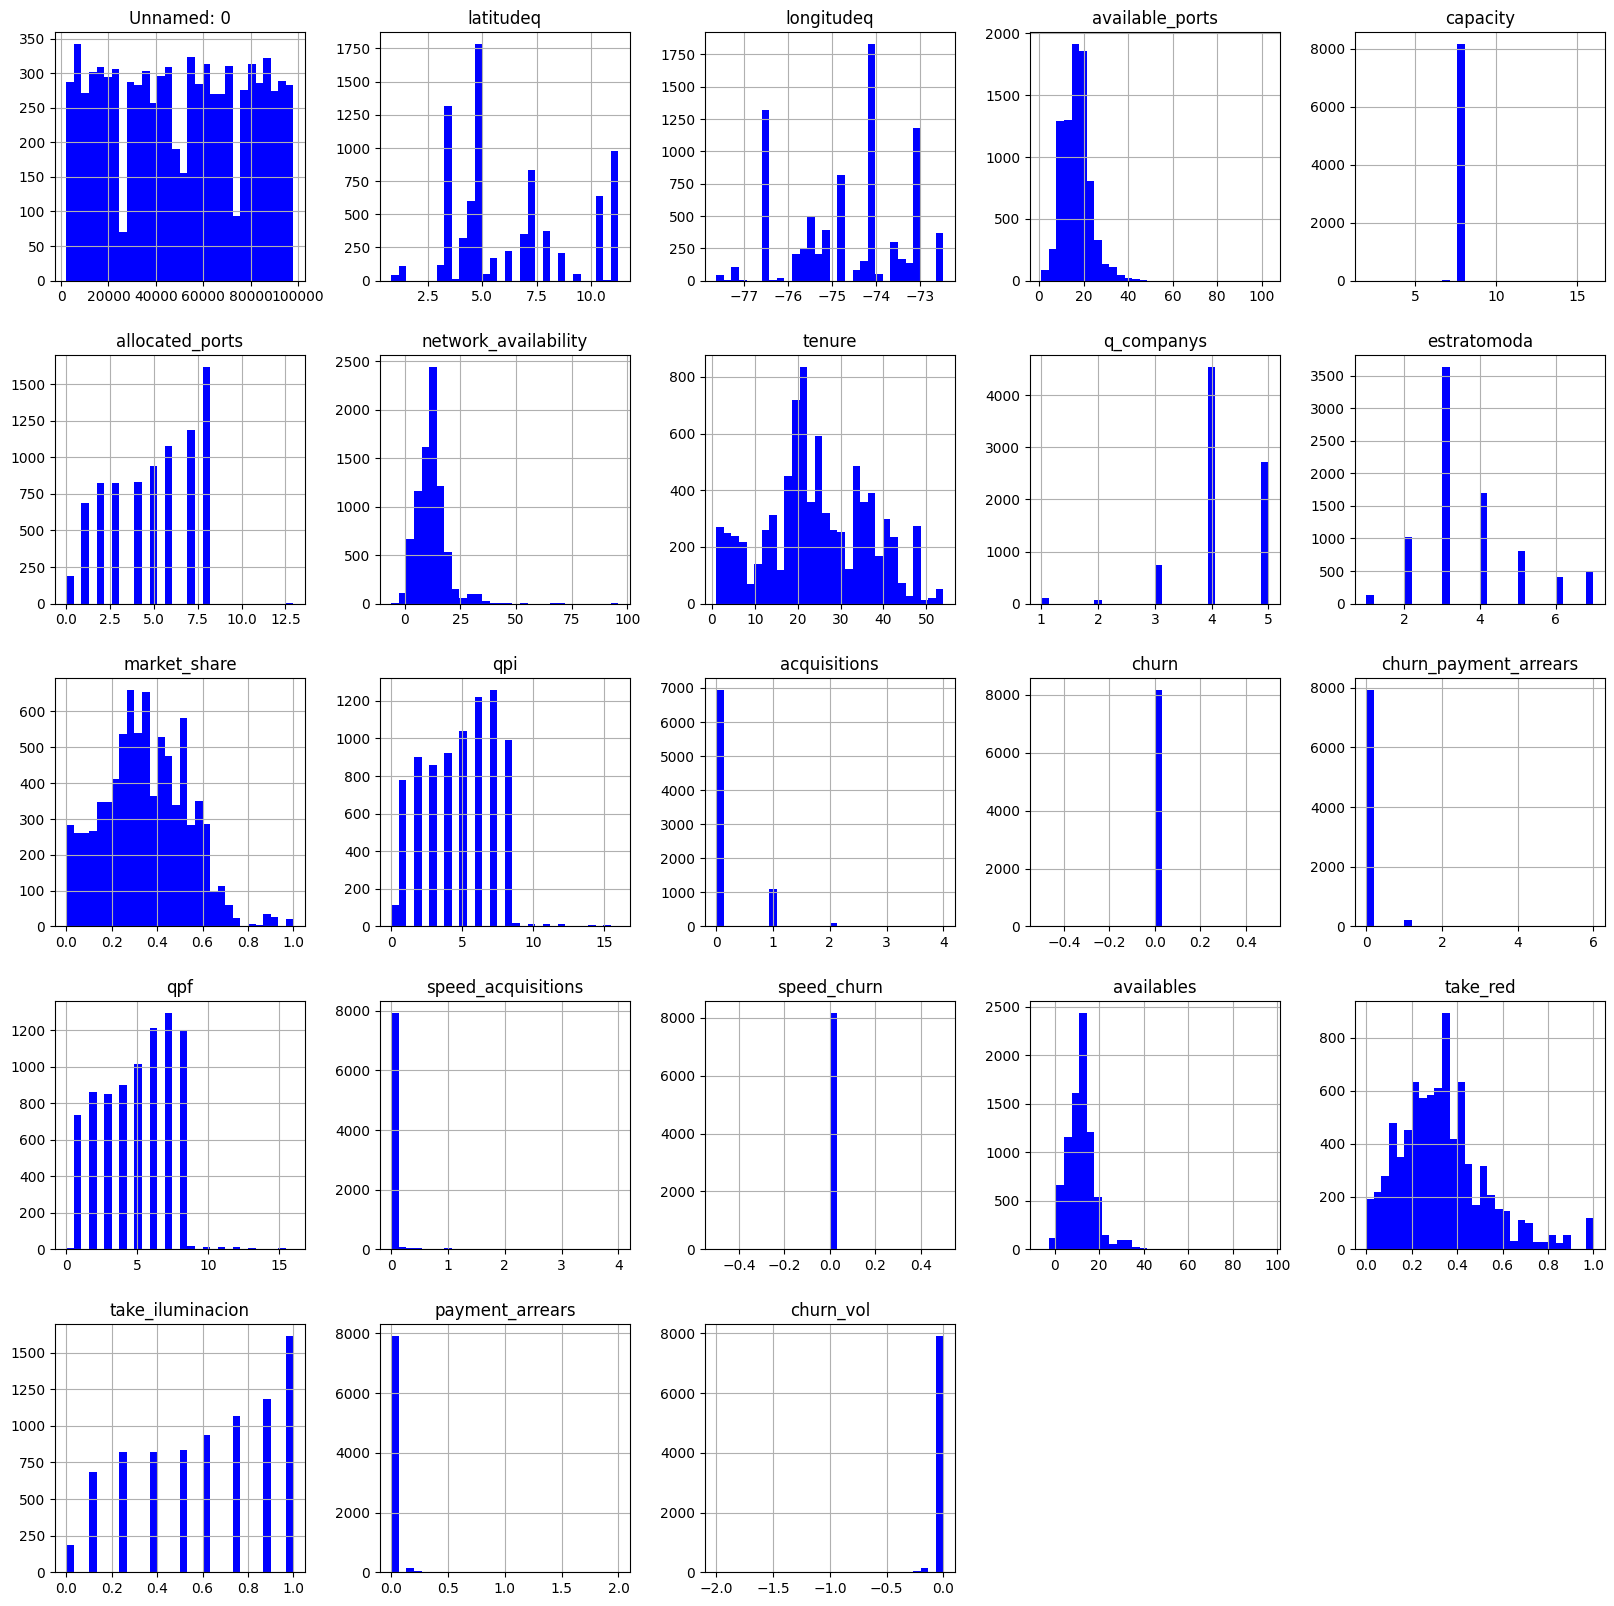

In [78]:
df1.hist(bins=30, figsize=(20,20), color = 'b')

In [79]:
missing_values = df1.isnull()
missing_values.sum()

Unnamed: 0               0
id_grupo                 0
llave_cto_camp           0
latitudeq                0
longitudeq               0
available_ports          0
capacity                 0
allocated_ports          0
network_availability     0
tenure                   0
q_companys               0
estratomoda              0
market_share             0
qpi                      0
acquisitions             0
churn                    0
churn_payment_arrears    0
qpf                      0
speed_acquisitions       0
speed_churn              0
availables               0
take_red                 0
take_iluminacion         0
payment_arrears          0
churn_vol                0
dtype: int64

In [80]:
df1.describe()

,Unnamed: 0,latitudeq,longitudeq,available_ports,capacity,allocated_ports,network_availability,tenure,q_companys,estratomoda,...,churn,churn_payment_arrears,qpf,speed_acquisitions,speed_churn,availables,take_red,take_iluminacion,payment_arrears,churn_vol
count,8170.000000,8170.000000,8170.000000,8170.000000,8170.000000,8170.000000,8170.000000,8170.00000,8170.000000,8170.000000,...,8170.0,8170.000000,8170.000000,8170.000000,8170.0,8170.000000,8170.000000,8170.000000,8170.000000,8170.000000
mean,49883.198898,6.245694,-74.630629,16.694370,8.000719,4.962653,11.731717,24.47552,4.188250,3.635251,...,0.0,0.036965,4.971971,0.023203,0.0,11.731717,0.328074,0.620278,0.007331,-0.007331
std,28273.360415,2.728125,1.268919,6.260629,0.171593,2.414055,6.264800,12.03513,0.729766,1.331973,...,0.0,0.244623,2.357470,0.143287,0.0,6.264800,0.189730,0.301359,0.055764,0.055764
min,2181.000000,0.821855,-77.643631,1.000000,2.000000,0.000000,-6.000000,1.00000,1.000000,1.000000,...,0.0,0.000000,0.000000,0.000000,0.0,-6.000000,0.000000,0.000000,0.000000,-2.000000
25%,23815.750000,4.408143,-75.548372,12.000000,8.000000,3.000000,8.000000,17.00000,4.000000,3.000000,...,0.0,0.000000,3.000000,0.000000,0.0,8.000000,0.200000,0.375000,0.000000,0.000000
50%,48948.000000,4.742260,-74.198957,16.000000,8.000000,5.000000,12.000000,23.00000,4.000000,3.000000,...,0.0,0.000000,5.000000,0.000000,0.0,12.000000,0.307692,0.625000,0.000000,0.000000
75%,73402.750000,7.896829,-73.634194,20.000000,8.000000,7.000000,15.000000,34.00000,5.000000,4.000000,...,0.0,0.000000,7.000000,0.000000,0.0,15.000000,0.416667,0.875000,0.000000,0.000000
max,98032.000000,11.246954,-72.459140,103.000000,15.990160,12.957447,96.000000,54.00000,5.000000,7.000000,...,0.0,6.000000,16.000000,4.000000,0.0,96.000000,1.000000,1.000000,2.000000,0.000000


In [81]:
df1 = df1.drop(['Unnamed: 0'], axis = 1)

###<font color = 'E506A5'> Correlation Matrix </font>

In [82]:
corr = df1.corr(numeric_only=True, method='kendall')

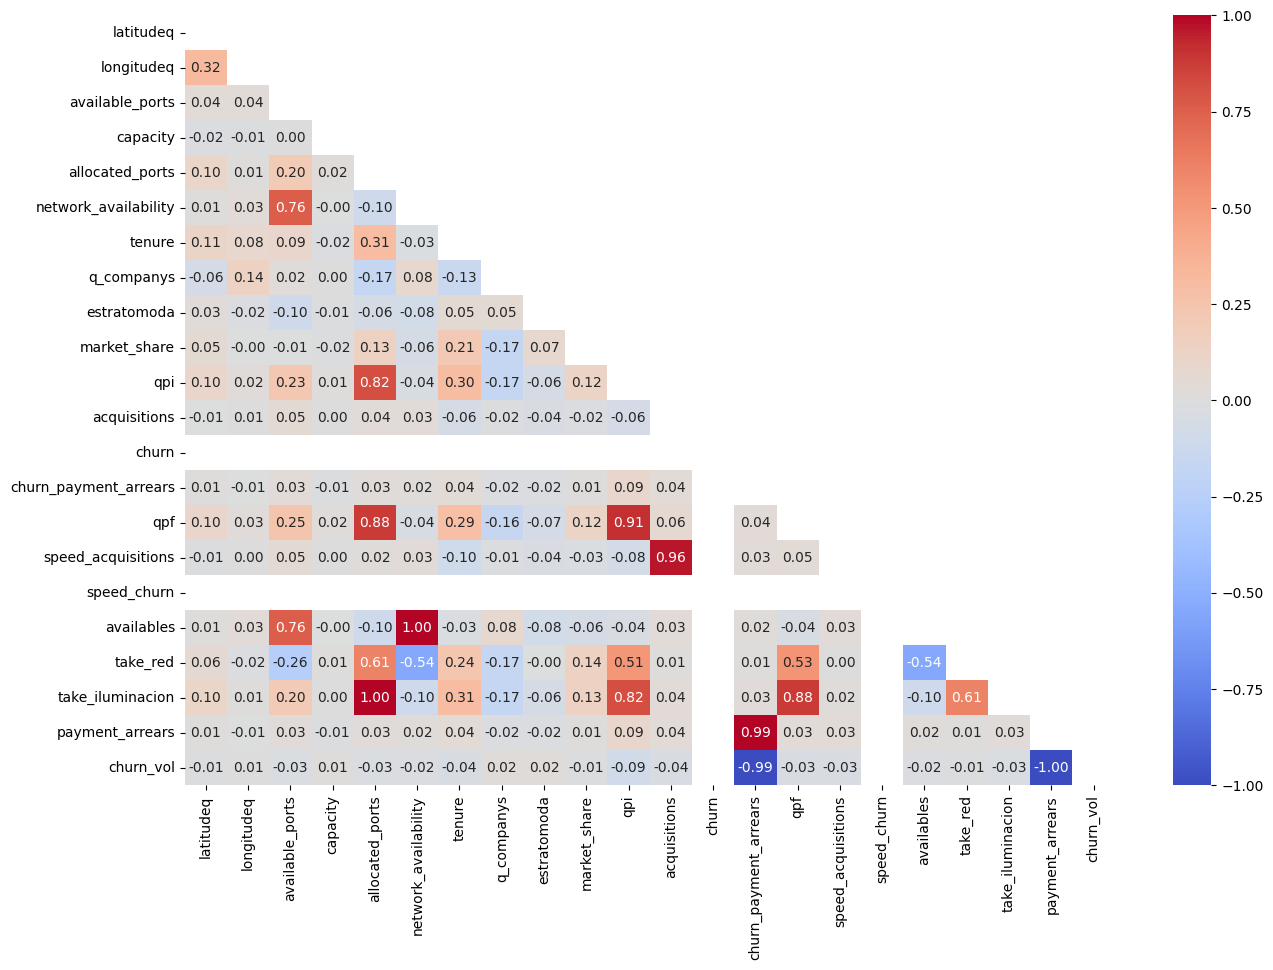

In [83]:
import seaborn as sns

lower = corr.where(np.tril(np.ones(corr.shape), k=-1).astype(bool))
plt.figure(figsize=(15,10))
sns.heatmap(lower, annot=True, fmt=".2f", cmap='coolwarm', mask=np.isnan(lower))
plt.show()

Eliminacion valores menores a 1; ctos llenos

In [200]:
df2 = df1[df1['take_red'] < 1]

In [202]:
df2 = df2.reset_index(drop=True)

In [203]:
df2.shape

(8052, 25)

###<font color = 'E506A5'> Determining number of clusters using the elbow method </font>

In [204]:
X=df2[['take_red', 'market_share']]

In [205]:
inercia = []

for i in range(1,20):
  algoritmo = KMeans(n_clusters= i, init = 'k-means++', max_iter=300, n_init=10)
  algoritmo.fit(X)
  inercia.append(algoritmo.inertia_)

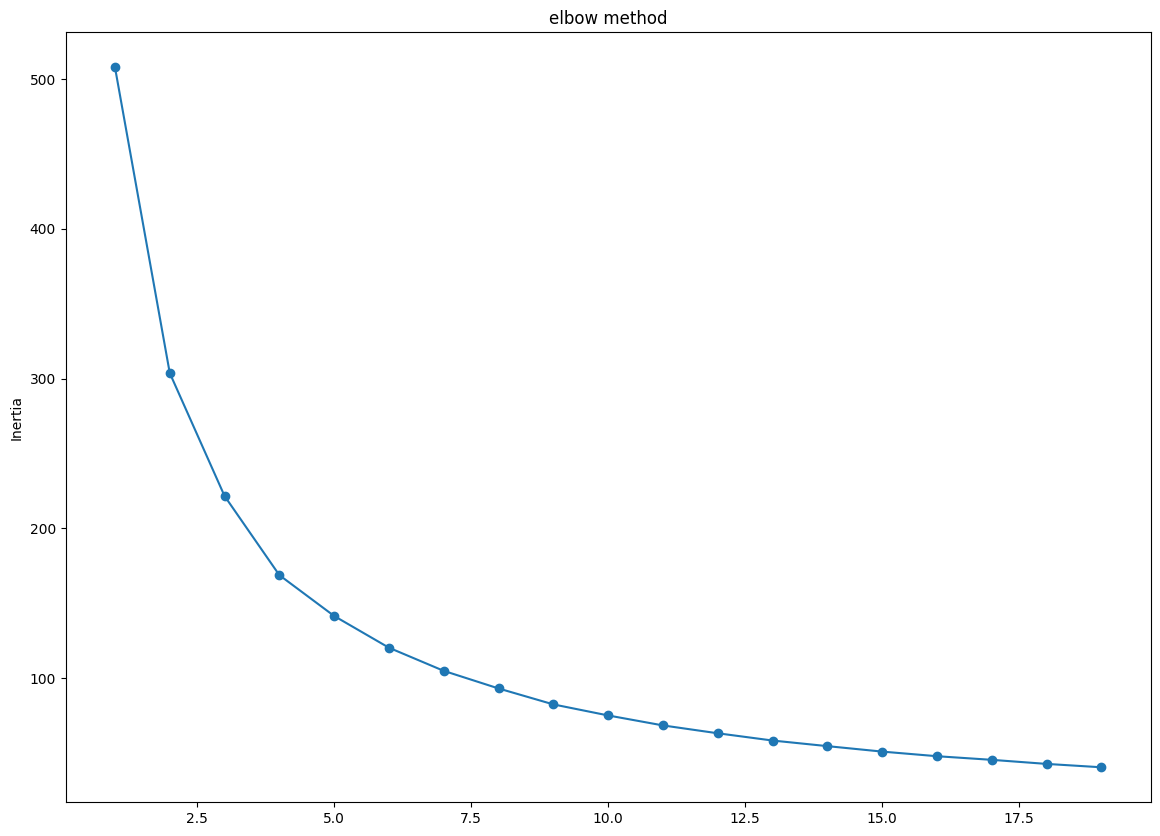

In [206]:
plt.figure(figsize=[14,10])
plt.title('elbow method')
plt.xlabel=('Number of clusters')
plt.ylabel('Inertia')
plt.plot(list(range(1,20)), inercia, marker='o')
plt.show()


###<font color = 'E506A5'> You run the model with the optimal number of clusters determined by the elbow method </font>

In [207]:
model = KMeans(n_clusters=6)
model.fit(X)

labels = model.predict(X)
centroids = model.cluster_centers_
X['cluster']=labels
df2['cluster']=labels

In [186]:
#a=X.groupby(['take_red','market_share', 'cluster']).agg({"cluster": "count"})
#b=a.add_suffix('_Cantidad').reset_index()
#b=b.rename(columns={"cluster": "Cluster", "cluster_Cantidad": "Cantidad"})
#c=a=X.groupby(['cluster']).agg({"cluster": "count"})

###<font color = 'E506A5'> The clusters created by the model are plotted on the graph </font>

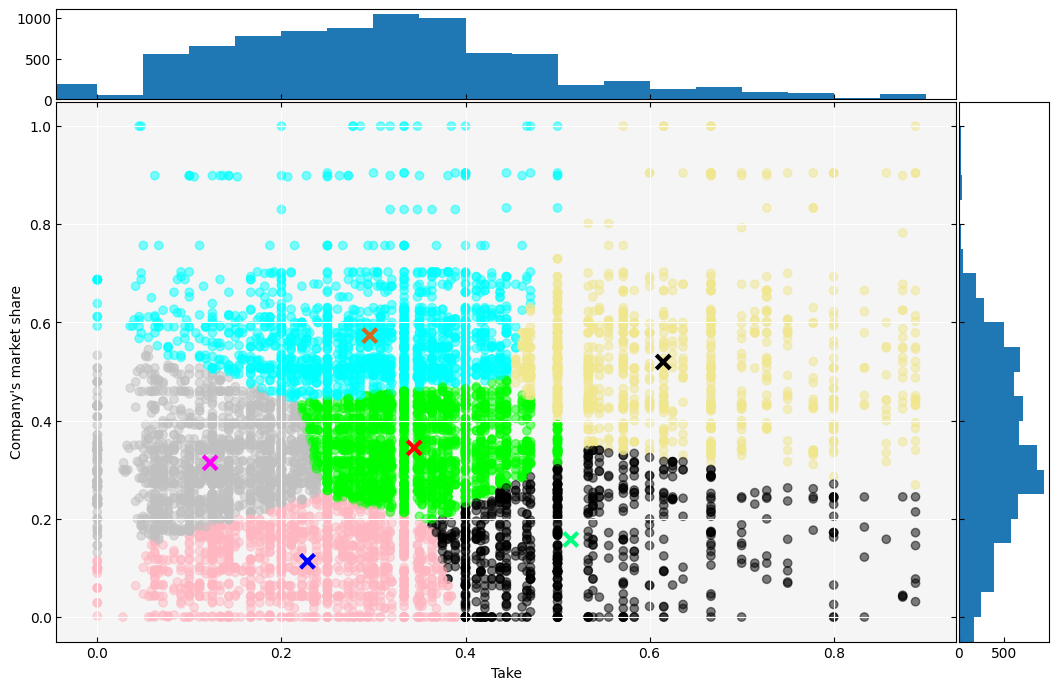

In [252]:
import numpy as np
import matplotlib.pyplot as plt

x = X['take_red']
y = X['market_share']
labels= X['cluster']

colors_list = ['Aqua', 'LightPink', 'Lime', 'silver','Khaki', 'black']
colors_clusters = [colors_list[labels[i]] for i in range(len(labels))]

centroids_colors = ['Chocolate', 'blue', 'red', 'magenta','black', 'SpringGreen']

# definitions for the axes
left, width = 0, 2
bottom, height = 0, 1.2
spacing = 0.005

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(figsize=(4.5, 4.5))

ax_scatter = plt.axes(rect_scatter)
ax_scatter.tick_params(direction='in', top=True, right=True)

ax_scatter.scatter(x, y, c= colors_clusters, alpha=.5 , cmap='unique')
ax_scatter.set_facecolor("whitesmoke")
plt.scatter(centroids[:,0], centroids[:,1], marker = 'x', s = 100, linewidths = 3, c = centroids_colors)

ax_scatter.set_xlabel("Take")
plt.ylabel("Company's market share")
plt.grid(color='white', linestyle='solid')

ax_histx = plt.axes(rect_histx)
ax_histx.tick_params(direction='in', labelbottom=False)
ax_histy = plt.axes(rect_histy)
ax_histy.tick_params(direction='in', labelleft=False)

# now determine nice limits by hand:
binwidth = 0.05
lim = np.ceil(np.abs([x, y]).max() / binwidth) * binwidth

bins = np.arange(-lim, lim + binwidth, binwidth)
ax_histx.hist(x, bins=bins)
ax_histy.hist(y, bins=bins, orientation='horizontal')

ax_histx.set_xlim(ax_scatter.get_xlim())
ax_histy.set_ylim(ax_scatter.get_ylim())

plt.show()

###<font color = 'E506A5'> Incorporation of the assigned cluster color into the dataset for segmentation identification in the graph, enabling the creation of sales campaigns by company sales channel </font>

In [209]:
df2['cluster_color'] =  colors_clusters

###<font color = 'DarkSalmon'> Segmentation model summary </font>

In [222]:
# Group by 'cluster' and 'cluster_color'
grouped_df = df2.groupby(['cluster', 'cluster_color'])
# Select the 'cluster' and 'cluster_color' columns
result = grouped_df[['cluster']]
# Count the number of rows in each group
result = result.count()
# Display the results
print(result)

                       cluster
cluster cluster_color         
0       Aqua              1620
1       LightPink         1317
2       Lime              1940
3       silver            1547
4       Khaki              881
5       black              747


##<font color = 'Indigo'> Sales Expansion Campaign Creation </font>

In [227]:
conditions = [
    (df2['cluster'] == 0),
    (df2['cluster'] == 1),
    (df2['cluster'] == 2),
    (df2['cluster'] == 3),
    (df2['cluster'] == 4),
    (df2['cluster'] == 5)
    ]

values = [ 'Maintaining Sales Dynamics',
           'Commercial Acceleration',
           'Network Expansion',
           'Direct Sales Force Deployment',
           'Customer Shielding',
           'Technology Change to Fiber Optics']

df2['Commercial_Deployment_Strategy'] = np.select(conditions, values)

##<font color = 'Indigo'> Deployment Strategy </font>

In [238]:
summary = df2.groupby(['Commercial_Deployment_Strategy']).agg({"cluster": "count", "available_ports": "sum" })
summary = summary.reset_index()
summary

,Commercial_Deployment_Strategy,cluster,available_ports
0,Commercial Acceleration,1317,23197
1,Customer Shielding,881,10154
2,Direct Sales Force Deployment,1547,28277
3,Maintaining Sales Dynamics,1620,29726
4,Network Expansion,1940,34303
5,Technology Change to Fiber Optics,747,10123
